In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflixxx.csv")

df.head()

,index,budget,genres,id,keywords,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,cast,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,blockbuster,10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,blockbuster,19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,blockbuster,26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,blockbuster,16-07-2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,mid,07-03-2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [5]:
# replace the director, cast, country as unknown if value is missing
df.fillna({"genres": "Unknown", "keywords": "Unknown", "original_language": "Unknown"}, inplace=True)

# drop the values if date or rating is missing
df.dropna(subset=["original_title"], inplace=True)

df = df[df["budget"] > 0]

df = df[df["revenue"] > 0]

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Detect and treat outliers (Example: Runtime in minutes, assuming available)
if "runtime" in df.columns:
    Q1 = df["runtime"].quantile(0.25)
    Q3 = df["runtime"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df.loc[(df["runtime"].isna()) | ((df["runtime"] >= lower_bound) & (df["runtime"] <= upper_bound))]

if "budget" in df.columns:
    Q1 = df["budget"].quantile(0.25)
    Q3 = df["budget"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df.loc[(df["budget"].isna()) | ((df["budget"] >= lower_bound) & (df["budget"] <= upper_bound))]

if "revenue" in df.columns:
    Q1 = df["revenue"].quantile(0.25)
    Q3 = df["revenue"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df.loc[(df["revenue"].isna()) | ((df["revenue"] >= lower_bound) & (df["revenue"] <= upper_bound))]

# Standardize categorical values
df.loc[:, "status"] = df["status"].str.upper()
df.loc[:, "director"] = df["director"].str.title()

df.head()

,index,budget,genres,id,keywords,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,cast,director
96,97,15000000,Action Adventure Drama Horror Science Fiction,315011,monster godzilla giant monster destruction kaiju,ja,シン・ゴジラ,low,29-07-2016,77000000,120.0,RELEASED,A god incarnate. A city doomed.,Shin Godzilla,6.5,143,Hiroki Hasegawa Yutaka Takenouchi Satomi Ishih...,Hideaki Anno
98,99,38000000,Action Crime Thriller,9799,street gang car race undercover auto-tuning lo...,en,The Fast and the Furious,low,22-06-2001,207283925,106.0,RELEASED,Live life 1/4 mile at a time.,The Fast and the Furious,6.6,3428,Paul Walker Vin Diesel Michelle Rodriguez Jord...,Rob Cohen
150,151,70000000,Adventure Action Animation,2310,denmark nordic mythology lie pride and vanity ...,en,Beowulf,mid,05-11-2007,195735876,115.0,RELEASED,Evil breeds pain.,Beowulf,5.5,841,Ray Winstone Angelina Jolie Anthony Hopkins Ro...,Robert Zemeckis
154,155,100000000,Comedy,7552,based on novel desperation robber hold-up robb...,en,Fun with Dick and Jane,mid,21-12-2005,202026112,90.0,RELEASED,Giving big businesses a run for their money!,Fun with Dick and Jane,5.9,627,Jim Carrey T\u00e9a Leoni Alec Baldwin Richard...,Dean Parisot
206,207,65000000,Action Adventure Science Fiction,861,oxygen falsely accused resistance mars double ...,en,Total Recall,mid,01-06-1990,261317921,113.0,RELEASED,"They stole his mind, now he wants it back.",Total Recall,7.1,1710,Arnold Schwarzenegger Sharon Stone Rachel Tico...,Paul Verhoeven


                 mean      median        mode      variance  skewness   min  \
budget   2.892504e+07  21075000.0  20000000.0  6.428018e+14  1.112865   1.0   
revenue  6.534283e+07  41481529.0   8000000.0  4.248426e+15  1.182953   5.0   
runtime  1.073897e+02       105.0       100.0  2.559137e+02  0.586651  63.0   

                 max  
budget   120000000.0  
revenue  274703340.0  
runtime        158.0  


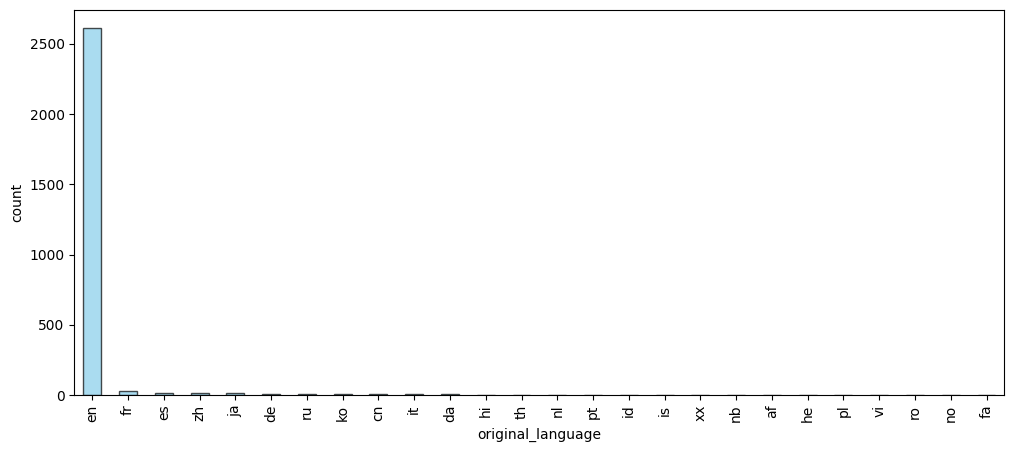

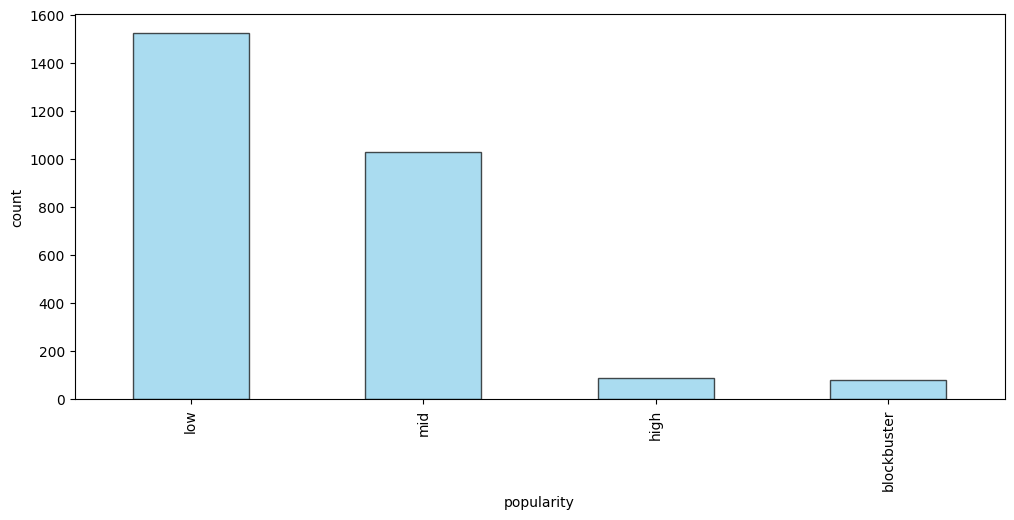

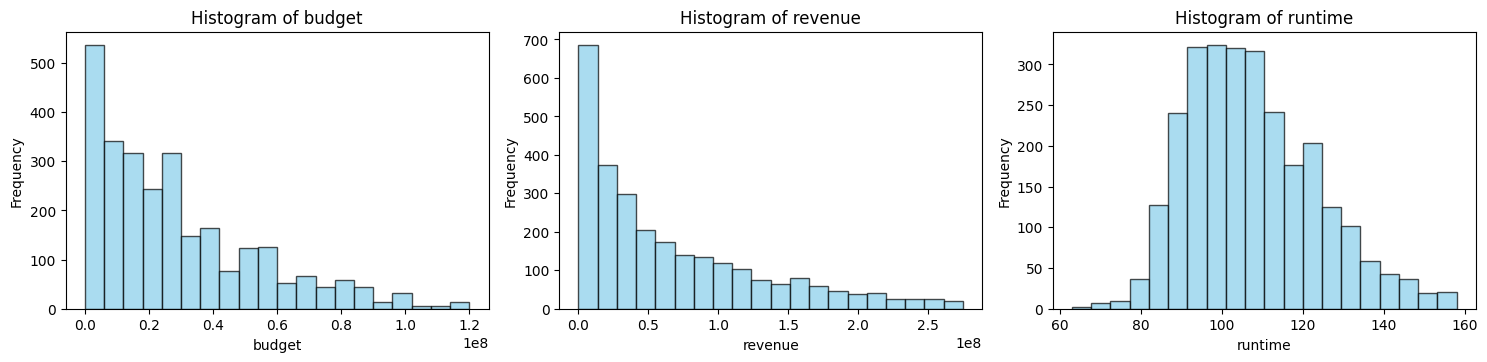

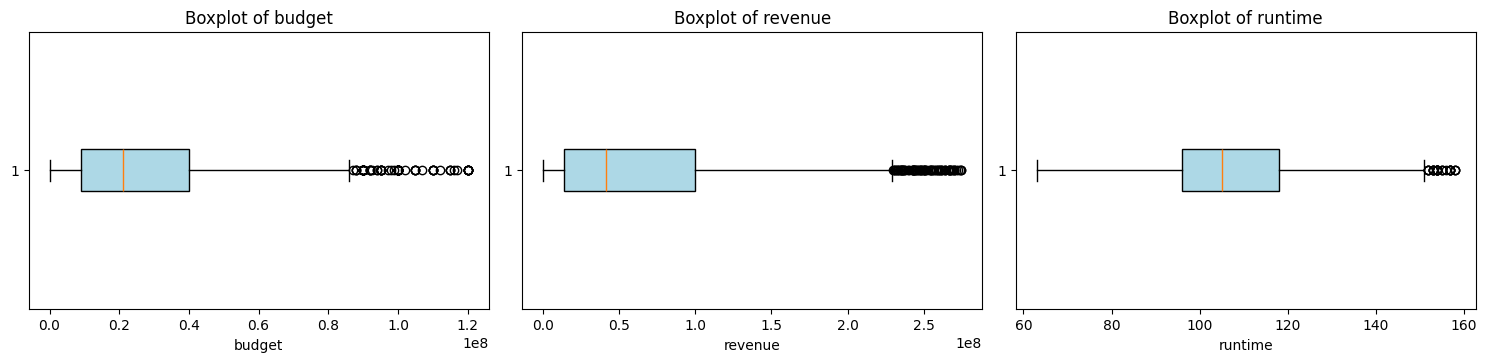

In [6]:
# Summary Statistics for Numerical Variables
numerical_cols = ["budget", "revenue", "runtime"]

stats_df = pd.DataFrame(index=numerical_cols)
stats_df["mean"] = df[numerical_cols].mean()
stats_df["median"] = df[numerical_cols].median()
stats_df["mode"] = df[numerical_cols].mode().iloc[0]  # First mode value
stats_df["variance"] = df[numerical_cols].var()
stats_df["skewness"] = df[numerical_cols].skew()
stats_df["min"] = df[numerical_cols].min()
stats_df["max"] = df[numerical_cols].max()

print(stats_df)

# Frequency Distributions for Categorical Variables
categorical_cols = ["original_language", "popularity"]
categorical_distributions = {col: df[col].value_counts() for col in categorical_cols}

plt.figure(figsize=(12,5))
df["original_language"].value_counts().plot(kind="bar", color="skyblue", edgecolor='black', alpha=0.7)
plt.xlabel("original_language")
plt.ylabel("count")

plt.show()

plt.figure(figsize=(12,5))
df["popularity"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("popularity")
plt.ylabel("count")

plt.show()
# Plot Histograms for Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot Box Plots for Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



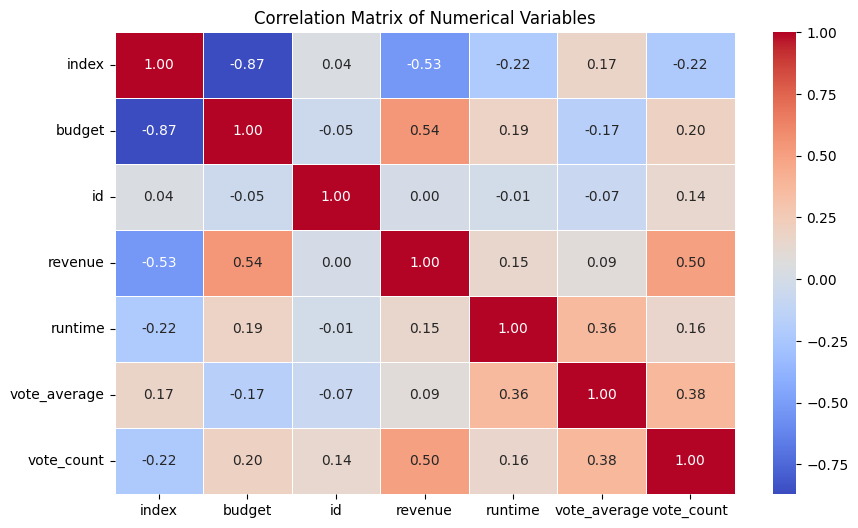

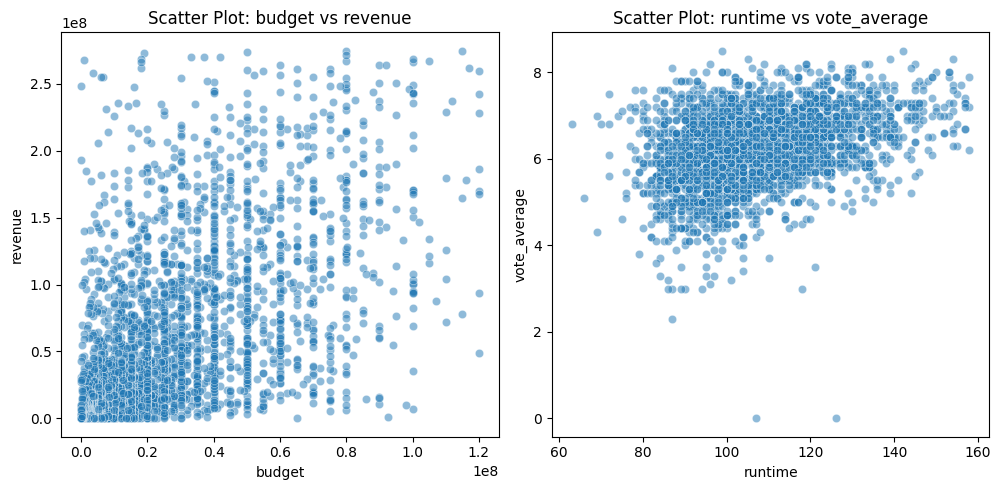

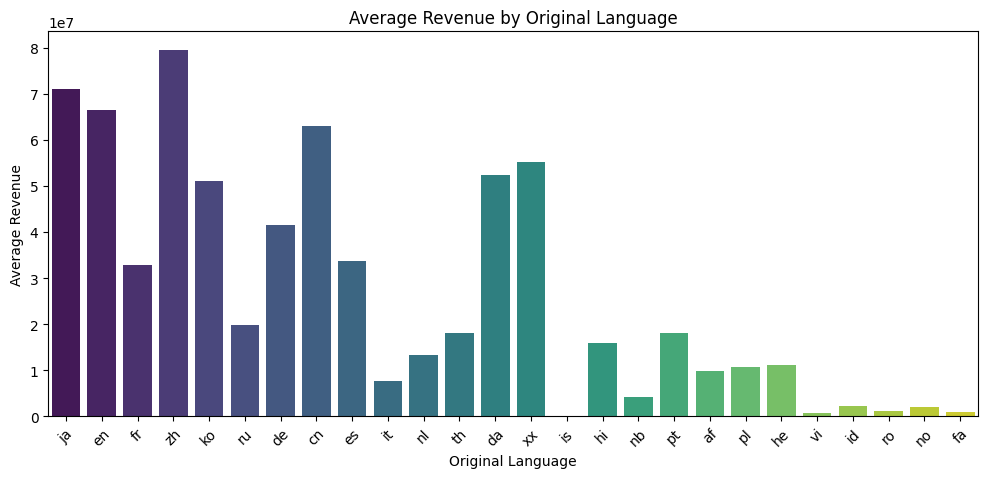

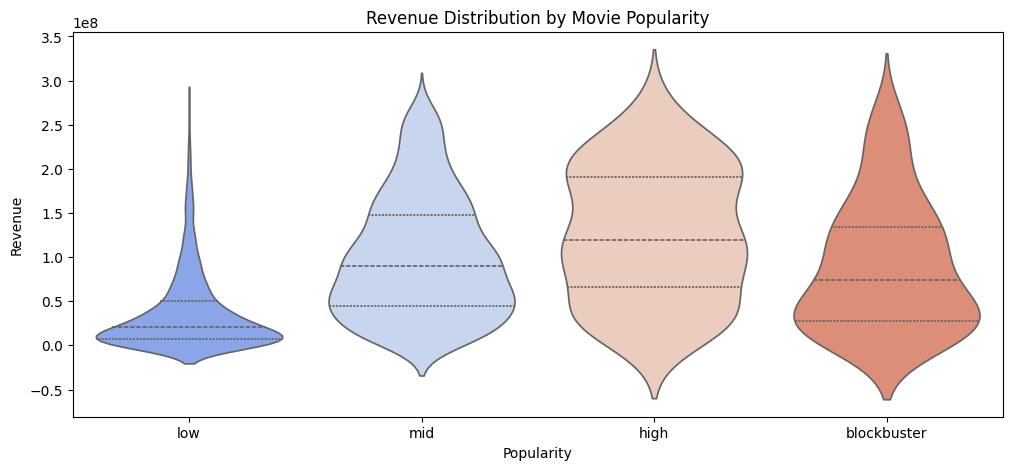

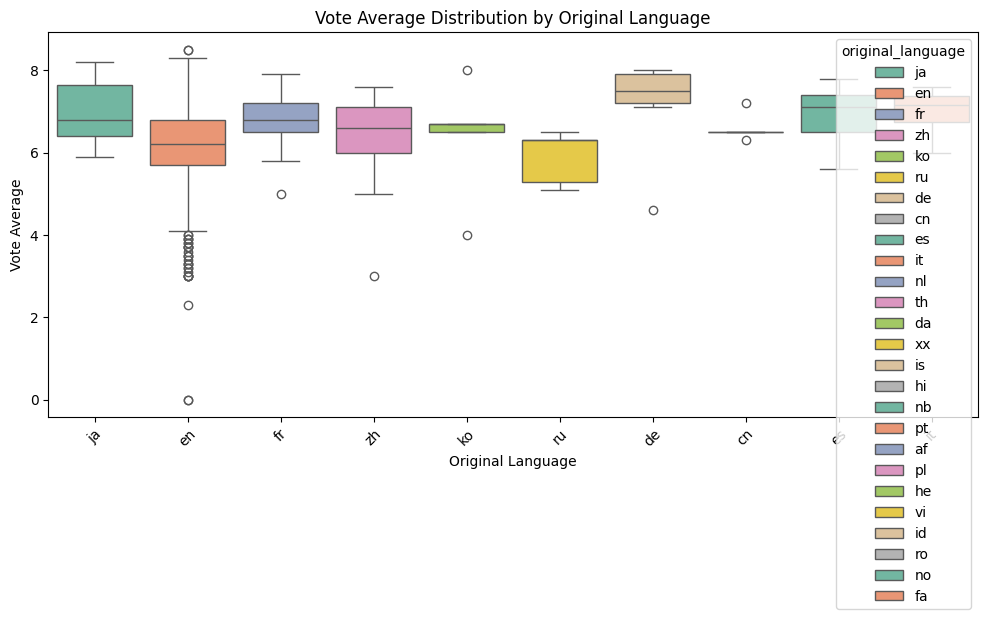

,index,budget,id,revenue,runtime,vote_average,vote_count
index,1.000000,-0.870783,0.041019,-0.531148,-0.218261,0.173688,-0.222687
budget,-0.870783,1.000000,-0.051719,0.544869,0.186136,-0.172220,0.201495
id,0.041019,-0.051719,1.000000,0.002608,-0.011422,-0.067056,0.140169
revenue,-0.531148,0.544869,0.002608,1.000000,0.150939,0.089623,0.496035
runtime,-0.218261,0.186136,-0.011422,0.150939,1.000000,0.361756,0.158860
vote_average,0.173688,-0.172220,-0.067056,0.089623,0.361756,1.000000,0.378347
vote_count,-0.222687,0.201495,0.140169,0.496035,0.158860,0.378347,1.000000


In [10]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Scatter plots for key numerical relationships
scatter_pairs = [('budget', 'revenue'), ('runtime', 'vote_average')]

plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[x], y=df[y], alpha=0.5)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

# Bar plot for categorical vs numerical variable (average revenue by original language)
plt.figure(figsize=(12, 5))
sns.barplot(x=df['original_language'], y=df['revenue'], hue = df["original_language"], estimator=np.mean, palette='viridis', errorbar=None)
plt.title('Average Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

# Violin plot for distribution of revenue by movie status
plt.figure(figsize=(12, 5))
sns.violinplot(x=df['popularity'], y=df['revenue'], hue = df["popularity"], palette='coolwarm', inner='quartile')
plt.title('Revenue Distribution by Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

# Box plot for vote_average distribution by original language (top 10 languages)
top_languages = df['original_language'].value_counts().nlargest(10).index
df_filtered = df[df['original_language'].isin(top_languages)]

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_filtered['original_language'], y=df_filtered['vote_average'], hue = df["original_language"], palette='Set2')
plt.title('Vote Average Distribution by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)
plt.show()

correlation_matrix

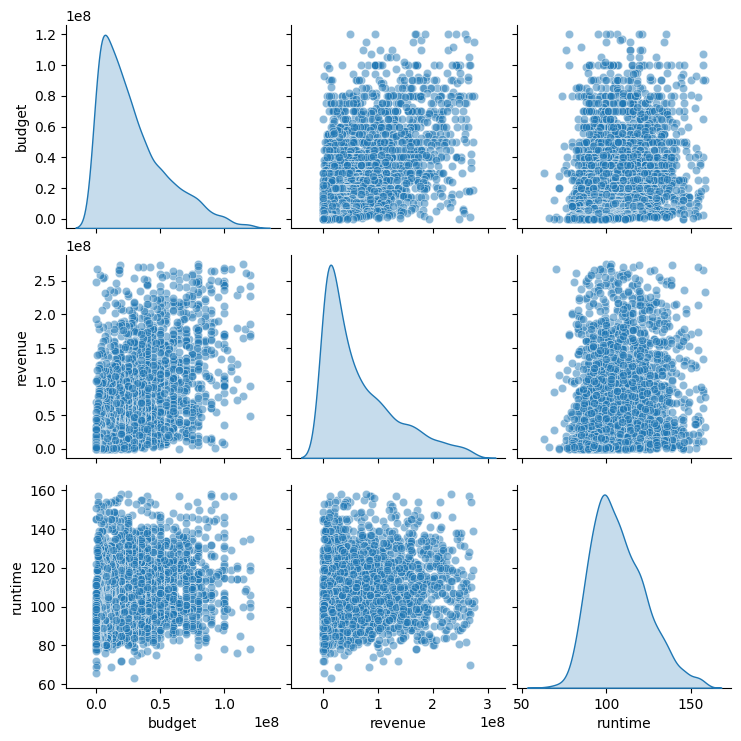

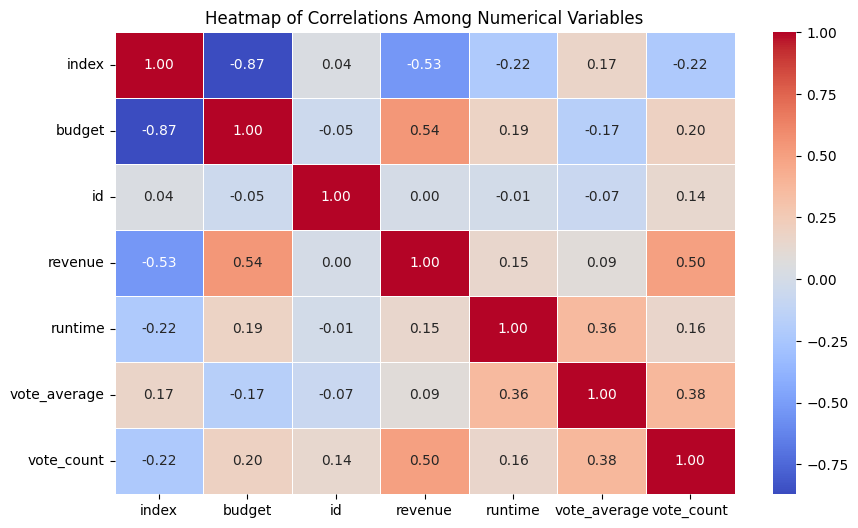

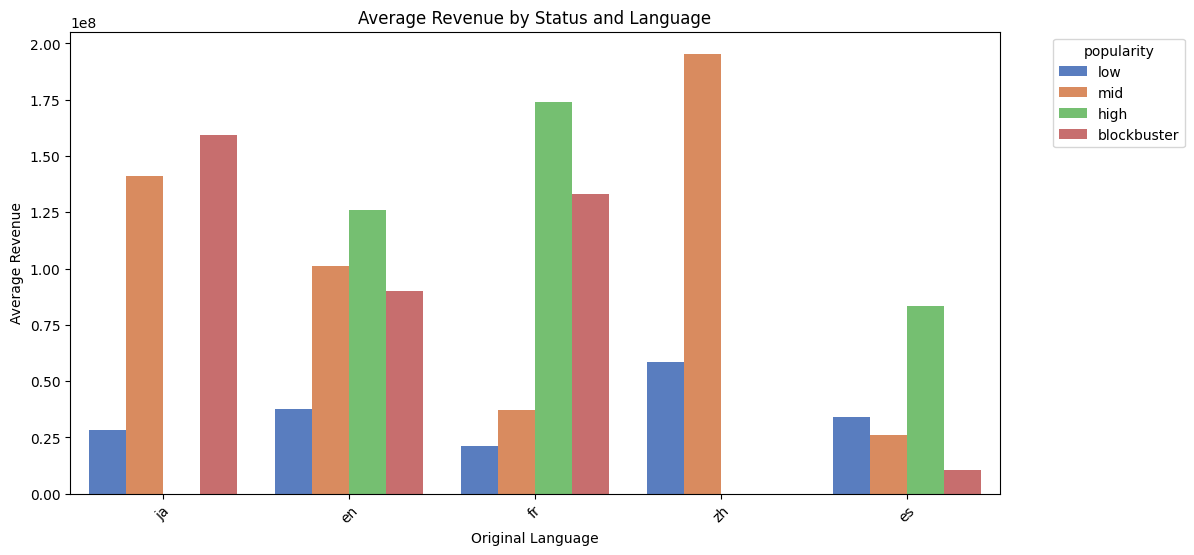

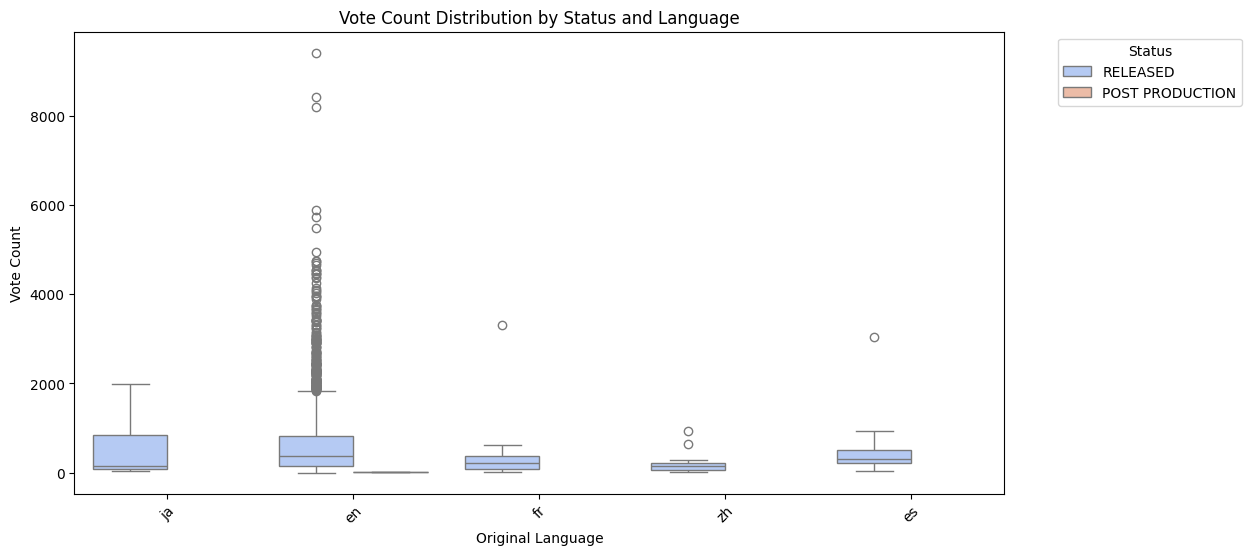

In [8]:
# Pair Plot to analyze relationships among multiple variables
sns.pairplot(df, vars=['budget', 'revenue', 'runtime'], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# Heatmap to visualize correlations among multiple variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations Among Numerical Variables")
plt.show()

# Grouped Comparisons: Average Revenue & Vote Count by Status and Language (Top 5 Languages)
top_languages = df['original_language'].value_counts().nlargest(5).index
df_grouped = df[df['original_language'].isin(top_languages)]

plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='revenue', hue='popularity', data=df_grouped, errorbar=None, palette="muted")
plt.title("Average Revenue by Status and Language")
plt.xlabel("Original Language")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.legend(title="popularity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='original_language', y='vote_count', hue='status', data=df_grouped, palette="coolwarm")
plt.title("Vote Count Distribution by Status and Language")
plt.xlabel("Original Language")
plt.ylabel("Vote Count")
plt.xticks(rotation=45)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()